# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('HDFCBANK.NS')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,2010-01-04,151.915100,153.945740,150.743917,151.407433,3050490
1,2010-01-05,152.048706,153.634030,151.852766,152.298082,8386600
2,2010-01-06,152.151123,153.188703,150.347585,152.654319,6639840
3,2010-01-07,152.547440,157.499351,151.549936,157.499351,6123980
4,2010-01-08,152.747833,153.491503,151.496496,152.476183,7085900


In [4]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,2010-01-04,151.915100,153.945740,150.743917,151.407433,3050490
1,2010-01-05,152.048706,153.634030,151.852766,152.298082,8386600
2,2010-01-06,152.151123,153.188703,150.347585,152.654319,6639840
3,2010-01-07,152.547440,157.499351,151.549936,157.499351,6123980
4,2010-01-08,152.747833,153.491503,151.496496,152.476183,7085900


Visualizing Closing Price

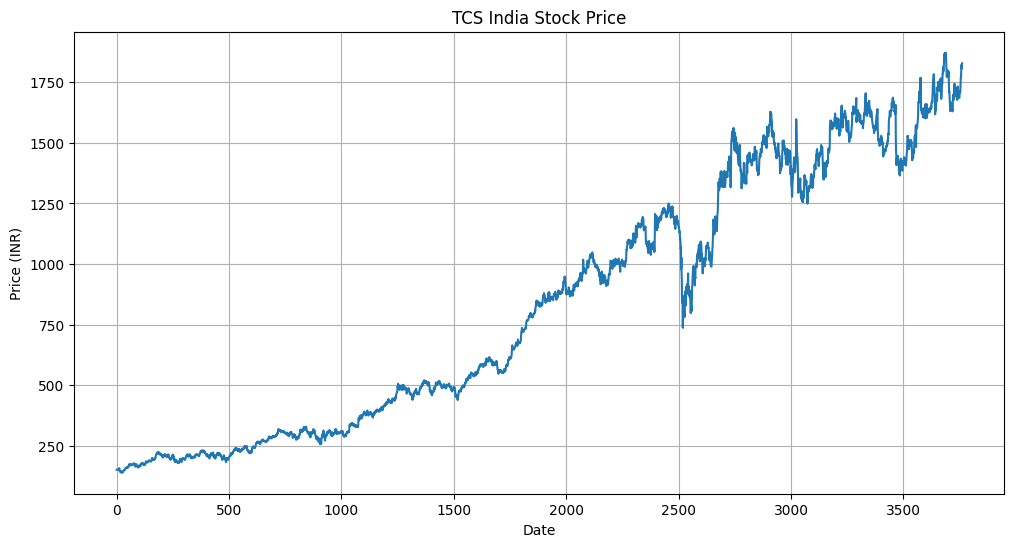

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [5]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,2010-01-04,151.915100,153.945740,150.743917,151.407433,3050490
1,2010-01-05,152.048706,153.634030,151.852766,152.298082,8386600
2,2010-01-06,152.151123,153.188703,150.347585,152.654319,6639840
3,2010-01-07,152.547440,157.499351,151.549936,157.499351,6123980
4,2010-01-08,152.747833,153.491503,151.496496,152.476183,7085900
...,...,...,...,...,...,...
3758,2025-03-25,1821.449951,1843.699951,1801.500000,1804.900024,19550708
3759,2025-03-26,1806.550049,1827.500000,1802.000000,1825.000000,12239221
3760,2025-03-27,1825.349976,1841.000000,1798.099976,1800.000000,20829050


# Plotting moving averages of 100 day

---



In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,HDFCBANK.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3758,1737.031000
3759,1737.739501
3760,1738.620000
3761,1739.761000


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

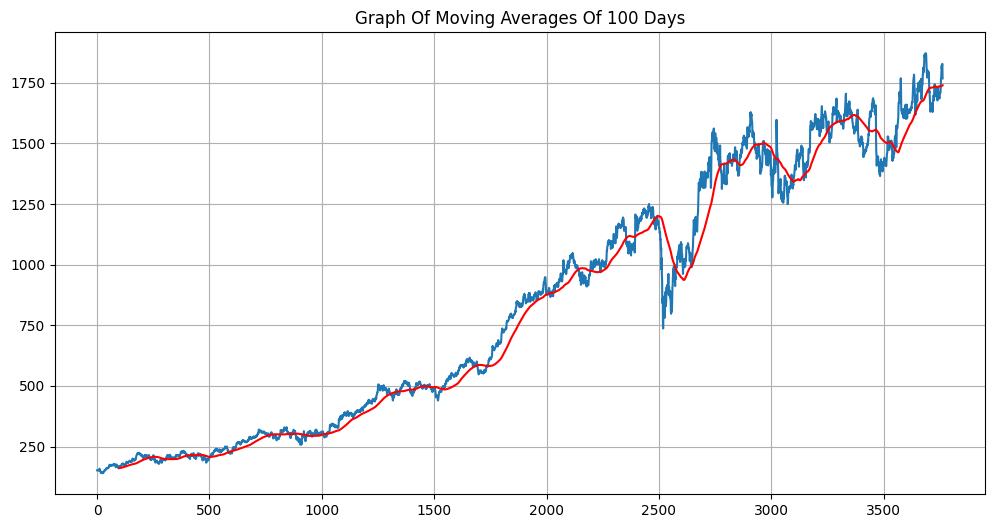

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,HDFCBANK.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3758,1698.704502
3759,1699.870502
3760,1701.190752
3761,1702.507751


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

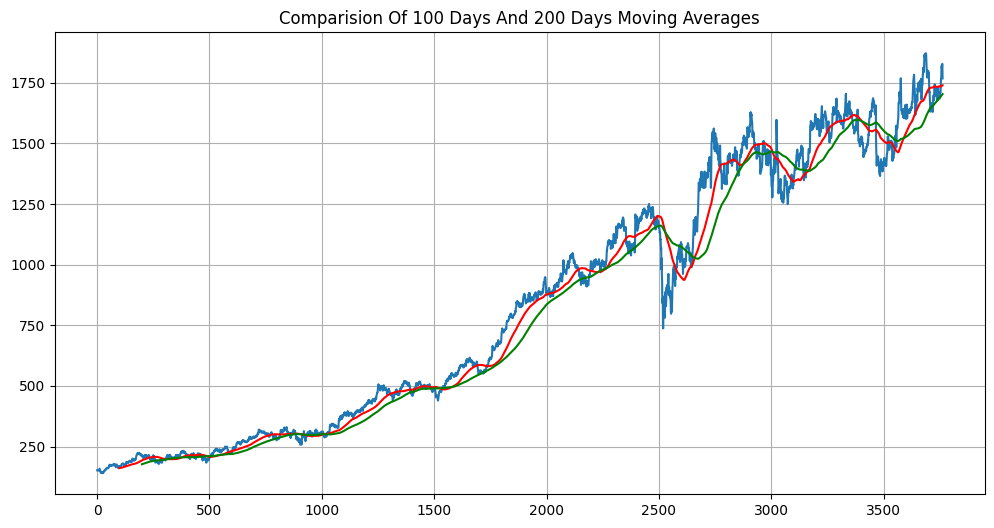

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [10]:
df.shape

(3763, 6)

# Spliting the dataset into training (70%) and testing (30%) set

In [11]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2634, 6)
(1129, 6)


In [12]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,2010-01-04,151.915100,153.945740,150.743917,151.407433,3050490
1,2010-01-05,152.048706,153.634030,151.852766,152.298082,8386600
2,2010-01-06,152.151123,153.188703,150.347585,152.654319,6639840
3,2010-01-07,152.547440,157.499351,151.549936,157.499351,6123980
4,2010-01-08,152.747833,153.491503,151.496496,152.476183,7085900


In [13]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
2634,2020-09-09,1052.616455,1065.576165,1047.576568,1056.936358,7864436
2635,2020-09-10,1046.904785,1060.632410,1040.616878,1058.856473,7594044
2636,2020-09-11,1035.480957,1060.632350,1028.137097,1052.568506,10397365
2637,2020-09-14,1015.609314,1050.216589,1010.233457,1044.456718,10825295
2638,2020-09-15,1027.656982,1033.080884,1015.753226,1025.257036,8252555


# Using MinMax scaler for normalization of the dataset

---



In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
train_close = train.iloc[:, 2:3].values
test_close = test.iloc[:, 2:3].values

In [29]:
train_close

array([[ 153.94573988],
       [ 153.63403003],
       [ 153.18870334],
       ...,
       [1080.35987399],
       [1074.69595907],
       [1074.02418095]])

In [30]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01205418],
       [0.01177404],
       [0.01137383],
       ...,
       [0.84462192],
       [0.83953176],
       [0.83892803]])

In [31]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
x_train.shape

(2534, 100, 1)

# ML Model (LSTM)

---



In [33]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [36]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - loss: 0.0649 - mean_absolute_error: 0.1713
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - loss: 0.0084 - mean_absolute_error: 0.0607
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 0.0066 - mean_absolute_error: 0.0529
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0066 - mean_absolute_error: 0.0522
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - loss: 0.0050 - mean_absolute_error: 0.0462
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0053 - mean_absolute_error: 0.0461
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - loss: 0.0046 - mean_absolute_error: 0.0429
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0047 - mean_absolute_error: 0.0429
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - loss: 0.0046 - mean_absolute_error: 0.0441
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - loss: 0.0041 - mean_absolute_error: 0.0418
Epoch 11/1

In [37]:
model.save('keras_model.h5')

In [38]:
test_close.shape

(1129, 1)

In [39]:
past_100_days = pd.DataFrame(train_close[-100:])

In [40]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [41]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [42]:
final_df.head()

,0
0,922.491457
1,896.619932
2,895.660025
3,920.139480
4,920.043535


In [43]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08858926],
       [0.06396328],
       [0.06304959],
       ...,
       [0.9628776 ],
       [0.95811831],
       [0.93327488]])

In [44]:
input_data.shape

(1229, 1)

# Testing the model

---



In [45]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [46]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1129, 100, 1)
(1129,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [47]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


In [48]:
y_pred.shape

(1129, 1)

In [49]:
y_test

array([0.22478537, 0.22007963, 0.22007957, ..., 0.9628776 , 0.95811831,
       0.93327488])

In [50]:
y_pred

array([[0.27724797],
       [0.2809217 ],
       [0.2840325 ],
       ...,
       [0.8894391 ],
       [0.9040075 ],
       [0.9139916 ]], dtype=float32)

In [51]:
scaler.scale_

array([0.00095186])

In [52]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

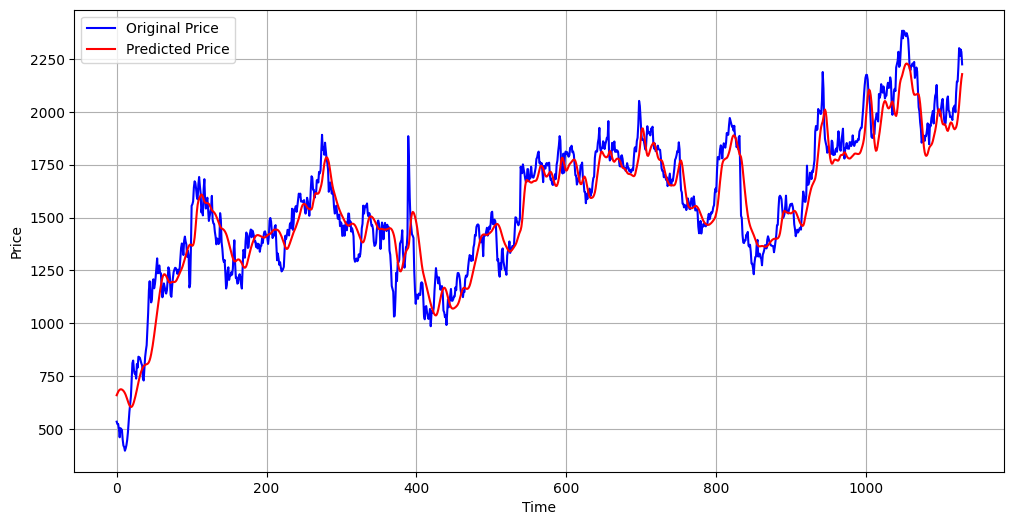

In [53]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [54]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.35%


Calculation of R2 score

In [55]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8976947824465469


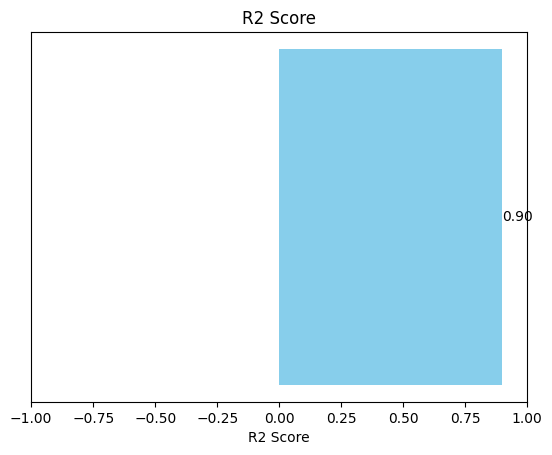

In [56]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

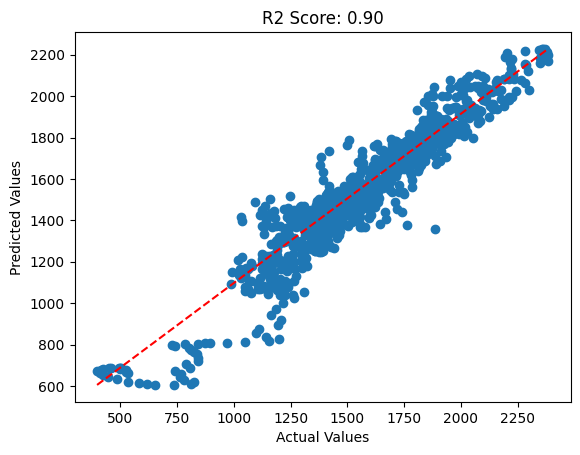

In [57]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()